* [jph00/uk-young-covid.ipynb](https://gist.github.com/jph00/635082450a8c9491dee52d5158c790a6)

In [2]:
import requests, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt 
endpoint = ('https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName=england&'
            'structure={"date":"date","newCases":"newCasesBySpecimenDateAgeDemographics"}')
data = requests.get(endpoint, timeout=20).json()['data'] 
rows = [(o['date'],p['age'],p['cases']) for o in data for p in o['newCases']]
df = pd.DataFrame(rows, columns=['date','age','cases'])
df['date']= pd.to_datetime(df['date'])
df = df.query("age not in ['00_59','60+'] & '2020-03-01'<=date<'2021-08-01'")
young = df.query("age in ['00_04','05_09','10_14','15_19']"
                ).groupby(pd.Grouper(key='date', freq='M')).sum()


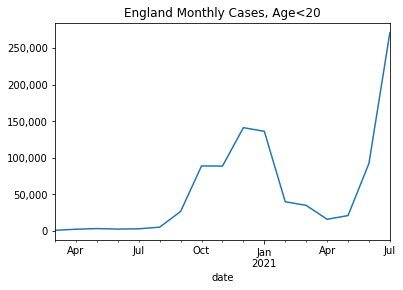

In [3]:
young.plot(y='cases', legend=False, title='England Monthly Cases, Age<20')
plt.gca().yaxis.set_major_formatter(mpl.tbicker.StrMethodFormatter('{x:,.0f}'))

In [4]:
young

,cases
date,
2020-03-31,562
2020-04-30,2059
2020-05-31,2924
2020-06-30,2229
2020-07-31,2646
2020-08-31,4875
2020-09-30,26398
2020-10-31,88670
2020-11-30,88447
